<span style="font-family:Papyrus; font-size:3em;">BIOE 498 Midterm</span>

<span style="font-family:Papyrus; font-size:2em;">Design of Experiments</span>

# Problem

BioModels model 45 shows bursting behavior of Calcium oscillations using the chemical species ``EC``, ``X``, ``Y``, and ``Z``.
Factors affecting the Ca oscillations include the initial concentrations of these four chemical species.
In this problem, you will find levels of these factors such that:
1. ``Y`` has oscillations of at least 1.5 Hz during the times 5 sec to 30 sec.
1. The "amplitude" (Fourier coefficient) for the oscillations is at least 2.5.
1. All concentrations of the chemical species are non-negative in the simulation.

There are three parts to answering this question.

1. (20 pts) **Design of Experiments**. What is your experimental design? That is: (a) what is the baseline; (b) what are the factors; (c) what are the levels of the factors; and (d) what $n$WD did you use.
Explain why you chose the particular levels and $n$. It may be that you use a "mixed" strategy in which you
do initial experiments with one design, and based on these outcomes, you do a new design.

1. (60 pts) **Experimental Infrastructure**. Implement the following functions.
As always, you should have documentation and tests for each function.
Note that BioModels 45 is the file ``BIOMD0000000045_url.xml`` in the ``common`` directory. (See code below.)

   1. ``runExperiment`` runs an experiment for levels of initial values of chemical species and returns
   the result of the simulation. The function optionally
   plots the results. 
   1. ``getResponse`` calculates the the
   values of the frequency with the largest amplitude (along with the amplitude) for a chemical species over a
   designated time interval.
   1. ``runStudy`` runs a set of experiments, checking for combinations of factor levels that match the
   objectives of this study.
    
1. (20 pts) **Studies and Analysis**. Describe the studies you conducted, showing how you found a combination of factor levels that meet the requirements.

Please put your answers to these questions in the separate sections below.

# Programming Preliminaries
This section provides the setup to run your python codes.

In [1]:
IS_COLAB = False
#
if IS_COLAB:
  !pip install matplotlib
  !pip install numpy
  !pip install tellurium
  !pip install SBstoat
#    
# Constants for standalone notebook
if not IS_COLAB:
    COMMON_DIR = "/home/ubuntu/advancing-biomedical-models/common"
else:
    from google.colab import drive
    drive.mount('/content/drive')
    COMMON_DIR = "/content/drive/My Drive/Winter 2021/common"
import sys
sys.path.insert(0, COMMON_DIR)

In [2]:
import util_doe1  # Various functions from lecture 5
import util_doe2  # Various functions from lecture 6

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from SBstoat.namedTimeseries import NamedTimeseries
import tellurium as te

# Model

In [3]:
modelPath = os.path.join(COMMON_DIR, "BIOMD0000000045_url.xml")
ROADRUNNER = te.loads(modelPath)
print(ROADRUNNER.getAntimony())

// Created by libAntimony v2.12.0
model *Goldbeter_Calcium_Oscillation_based_onCICR_AND_two_pool_model()

  // Compartments and Species:
  compartment extracellular, cytosol, intravesicular1, intravesicular2;
  species EC in extracellular, Z in cytosol, Y in intravesicular2, X in intravesicular1;

  // Reactions:
  vin: EC => Z; cytosol*(vin_v0 + vin_v1*beta);
  v2i: Z => Y; intravesicular2*v2i_Vm2i*Z^2/(v2i_K2i^2 + Z^2);
  v3i: Y => Z; cytosol*v3i_Vm3i*Y^2*Z^2/((v3i_K3y^2 + Y^2)*(v3i_K3z^2 + Z^2));
  v4: Y => Z; cytosol*v4_Kf*Y;
  v5: Z => EC; extracellular*v5_K*Z;
  v6: X => Z; cytosol*v6_Kf*X;
  v2s: Z => X; intravesicular1*v2s_Vm2s*Z^2/(v2s_K2s^2 + Z^2);
  v3s: X => Z; cytosol*beta*v3s_Vm3s*X^2/(v3s_K3s^2 + X^2);

  // Species initializations:
  EC = 0;
  Z = 0;
  Y = 0;
  X = 0.5;

  // Compartment initializations:
  extracellular = 1;
  cytosol = 1;
  intravesicular1 = 1;
  intravesicular2 = 1;

  // Variable initializations:
  beta = 1;
  vin_v0 = 0.015;
  vin_v1 = 0.012;
  v2i_

In [4]:
# Simulation constants
START_TIME = 0  # Start time for the simulation
END_TIME = 60  # End time for the simulation
BURST_DCT = {0: (15, 25), 1: (40, 50)}  # Where bursts should be preserved
NUM_POINT = 10*(END_TIME - START_TIME)  # Number of points in output
PARAMETERS = ["X", "Y", "Z", "EC"]
TIME = "time"

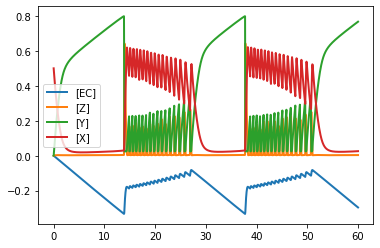

In [5]:
ROADRUNNER.plot(ROADRUNNER.simulate(0,60, 1200))

# Q1: Experimental Design

# Q2: Experimental Infrastructure

# Q3: Studies and Analysis